In [7]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [15]:
dataset_path = "/Users/shwetkumar/Documents/ML/Dataset"

train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')


In [17]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial blight_cassava': 1, 'brown spot_cassava': 2, 'fall armyworm_maize': 3, 'grasshoper_maize': 4, 'green mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_wilt_tomato': 10, 'leaf beetle_maize': 11, 'leaf blight_maize': 12, 'leaf blight_wilt_tomato': 13, 'leaf curl_wilt_tomato': 14, 'leaf miner_cashew': 15, 'leaf spot_maize': 16, 'mosaic_cassava': 17, 'red rust_cashew': 18, 'septoria leaf spot_wilt_tomato': 19, 'streak virus_maize': 20, 'verticulium wilt_wilt_tomato': 21}


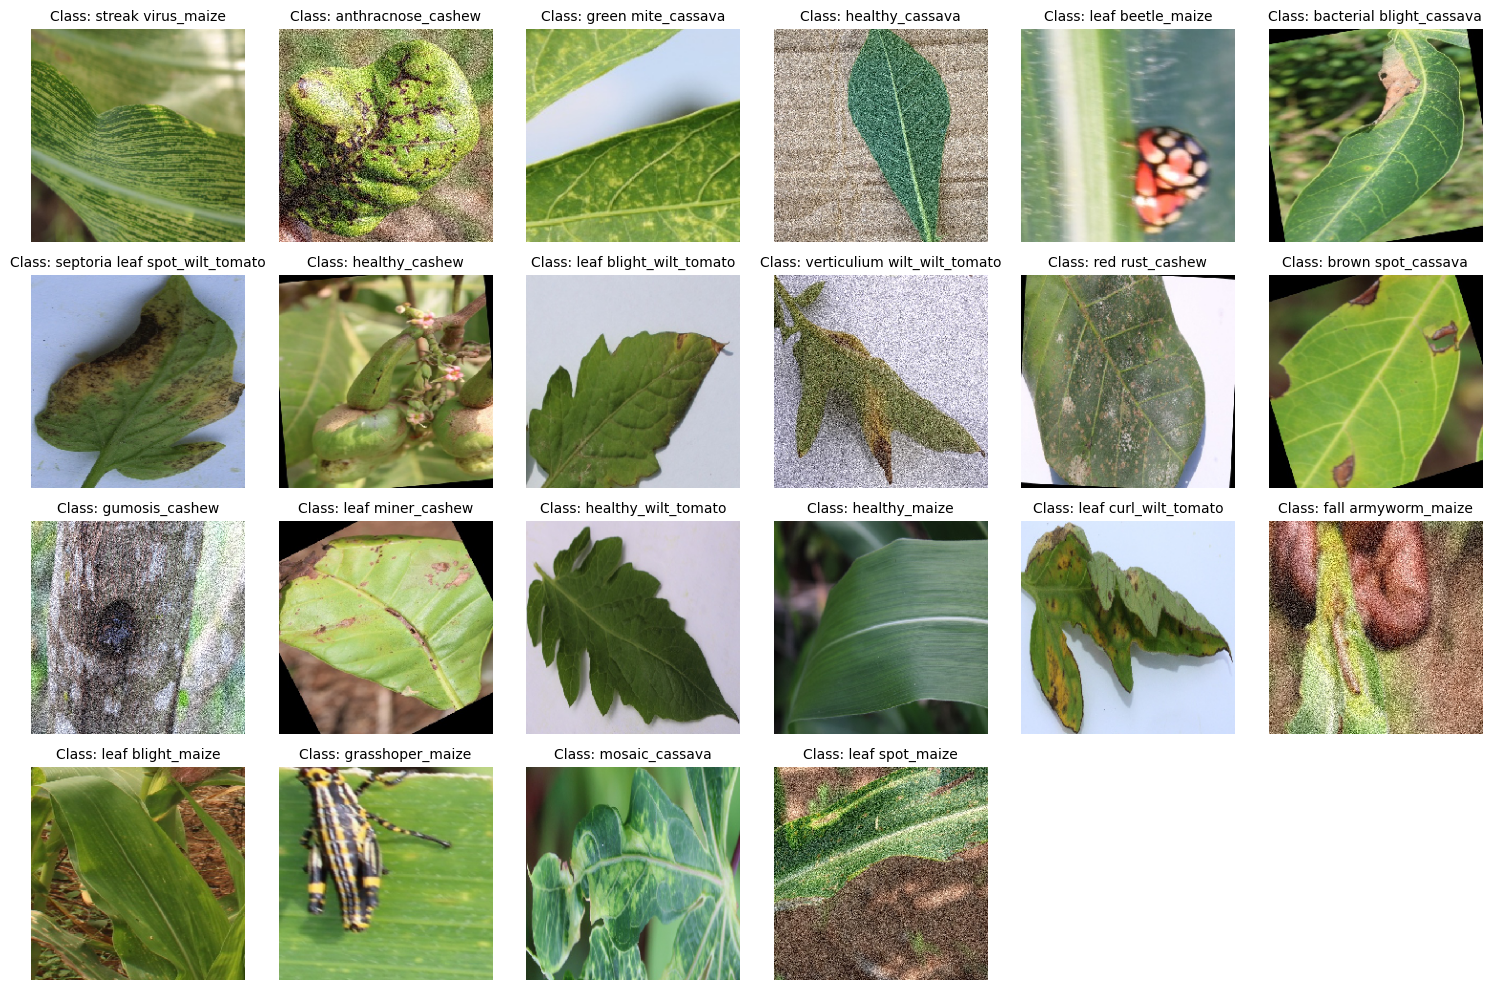

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve class indices and initialize tracking dictionary
class_indices = train_generator.class_indices
classes = list(class_indices.keys())
displayed_classes = {class_name: False for class_name in classes}

# Store images and their labels
images_to_display = []
labels_to_display = []

# Iterate through the training data to collect one image per class
for batch_images, batch_labels in train_generator:
    for image, label in zip(batch_images, batch_labels):
        class_idx = np.argmax(label)
        class_name = classes[class_idx]

        # Collect the image and label if not already collected
        if not displayed_classes[class_name]:
            images_to_display.append(image)
            labels_to_display.append(class_name)
            displayed_classes[class_name] = True

        # Stop once all classes are collected
        if all(displayed_classes.values()):
            break

    if all(displayed_classes.values()):
        break

# Display all collected images in a grid
num_classes = len(classes)
cols = 6  # Number of columns in the grid
rows = (num_classes // cols) + (num_classes % cols > 0)  # Calculate rows dynamically

plt.figure(figsize=(15, rows * 2.5))  # Adjust figure size based on rows
for i, (img, label) in enumerate(zip(images_to_display, labels_to_display)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
